### <h2>ALY6140_Summer2021_Pragati_Koladiya_Assignment_4</h2>

<p> <b>Week: </b>4</p>
<p> <b>Tittle:</b> Assignment 4 </p>

<b> AIM:</b> Create function to calculate the EMA(Explonential Moving Average) for number of days and use the libraries to plot the visulization. 

Copyright (c) 2021
<p> <b>Written By:</b> Pragati Koladiya </p> 


### Assignment Requirement:

- The attached csv file, "KCLT.csv" contains a year's worth of temperature data as measured by a weather station at the Charlotte/Douglas International Airport.

#### Complete the following tasks:

- Create a proper Jupyter notebook file that contains all of your analysis and code.

- Import the csv file into a pandas dataframe

- Write a function that can take as input ANY of the temperature data columns in the dataframe and return a N-day exponential moving average calculated from the given column, where N is an argument to your function (that is, the function should be able to calculate a 4-day exponential moving average or a 10-day exponential moving average, etc.)

- Using your choice of the plotting libraries we discussed in class (Matplotlib, Seaborn, Bookeh), create 2 separate GRAPHS (plots).

- The first plot should show two time series of data--the actual mean (average) daily temperature and the record min temperature for each day (a total of 365 daily points for each series)--each of the plotted lines for those two columns should use a different color and be properly labeled in a legend

- The second Graph (plot) should have 3 times series plotted on it: 

  (1) the record max temperature, 

  (2) the 20-day exponential moving average of the actual mean temperature, and 

  (3) the actual max temperature

- Both graphsshould have proper axes titles, labels, colored lines, etc. Try to follow Edward Tufte's rules as much as you can.

- Finally, include a short markdown paragraph discussing any important insights you derived from this visual analysis.


### Import Packages

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import DateFormatter
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTWlxkbPE-ejQoCzVmT5EuO6vzbFKvLQZUJ8cRgmj44rIehmyQpGeppLrIQZt-s7aJ5ayCetS6nJbzo/pub?gid=56464305&single=true&output=csv')
df.head(10)

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65
5,2014-7-6,74,61,87,68,89,57,99,1964,1948,0.00,0.10,1.95
6,2014-7-7,79,67,91,68,89,55,100,1972,1954,0.00,0.11,2.37
7,2014-7-8,83,72,94,68,89,58,101,1892,2010,0.00,0.11,1.87
8,2014-7-9,80,71,89,68,89,57,101,1891,1986,0.15,0.12,3.71
9,2014-7-10,78,71,85,68,89,53,101,1961,1926,0.00,0.11,2.45


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   365 non-null    object 
 1   actual_mean_temp       365 non-null    int64  
 2   actual_min_temp        365 non-null    int64  
 3   actual_max_temp        365 non-null    int64  
 4   average_min_temp       365 non-null    int64  
 5   average_max_temp       365 non-null    int64  
 6   record_min_temp        365 non-null    int64  
 7   record_max_temp        365 non-null    int64  
 8   record_min_temp_year   365 non-null    int64  
 9   record_max_temp_year   365 non-null    int64  
 10  actual_precipitation   365 non-null    float64
 11  average_precipitation  365 non-null    float64
 12  record_precipitation   365 non-null    float64
dtypes: float64(3), int64(9), object(1)
memory usage: 37.2+ KB


In [4]:
df.describe()

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,61.049315,49.958904,71.630137,48.819178,70.983562,31.465753,88.728767,1953.279452,1953.989041,0.102411,0.114082,2.208904
std,16.061789,16.575533,16.450481,13.832203,13.495207,18.430656,9.961209,39.170924,33.890497,0.301195,0.013650,0.879378
min,18.000000,7.000000,26.000000,29.000000,50.000000,-5.000000,69.000000,1879.000000,1879.000000,0.000000,0.090000,0.850000
25%,47.000000,37.000000,58.000000,36.000000,58.000000,15.000000,79.000000,1918.000000,1931.000000,0.000000,0.100000,1.650000
50%,63.000000,52.000000,73.000000,48.000000,72.000000,30.000000,90.000000,1963.000000,1953.000000,0.000000,0.110000,1.980000
75%,75.000000,65.000000,86.000000,63.000000,84.000000,49.000000,98.000000,1983.000000,1984.000000,0.030000,0.120000,2.540000
max,88.000000,75.000000,100.000000,68.000000,89.000000,62.000000,104.000000,2015.000000,2015.000000,2.650000,0.150000,6.880000


### Exploring LUX library for data exploration

In [5]:
!pip install lux-api
!pip install lux-widget
!jupyter nbextension install --py luxwidget --user 
!jupyter nbextension enable --py luxwidget
!jupyter nbextension enable --py --user luxwidget
!jupyter nbextension enable --py luxwidget

Installing /Users/pragati/opt/anaconda3/lib/python3.8/site-packages/luxwidget/nbextension/static -> luxwidget
Up to date: /Users/pragati/Library/Jupyter/nbextensions/luxwidget/index.js
Up to date: /Users/pragati/Library/Jupyter/nbextensions/luxwidget/index.js.map
Up to date: /Users/pragati/Library/Jupyter/nbextensions/luxwidget/extension.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable luxwidget --user --py
    
Enabling notebook extension luxwidget/extension...
      - Validating: OK
Enabling notebook extension luxwidget/extension...
      - Validating: OK
Enabling notebook extension luxwidget/extension...
      - Validating: OK


In [6]:
import pandas as pd
import lux

- LUX is a Python library that helps users to explore and discover meaningful insights from their data by automating certain data exploration aspects. 
- It is an effort towards bridging the gap between code and interactive interfaces. 
- Lux features an intent language that allows users to specify their analysis intent in a sloppy manner, and it automatically infers the unspecified details and determines appropriate visualization mappings.

<i>Note: LUX can only be used in Jupyter Notebook.</i>

In [7]:
#LUX does not supports publish to web CSV so we have to use the loacally stored csv path to see the lux visuals.

## Please give the path of your local machine (locate the KCLT csv file)
Data_path = "/Users/pragati/OneDrive - Northeastern University/Q6-Summer/Week4/KCLT.csv"
df_lux = pd.read_csv(Data_path)

In [8]:
df_lux

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<B>Click on Toggle Pandas/Lux - Its a toggle butten which helps to view the dataset as well as the distibution of the data by clicking on toggle butten on left top corrner of the cell</B>


- The recommendations in lux are organized by three different tabs, which represent potential next steps that users can take in their exploration.

 - <b> The Correlation Tab: </b>shows a set of pairwise relationships between quantitative attributes ranked by the most correlated to the least correlated one.
 - <b> The Distribution Tab: </b> shows a set of univariate distributions ranked by the most skewed to the least skewed.
 - <b> The Occurrence Tab: </b> shows a set of bar charts that can be generated from the data set.
 - <b> The Temporal Tab: </b> Shows a trend over time related attrivutes.

#### Question 1
- Write a function that can take as input ANY of the temperature data columns in the dataframe and return a N-day exponential moving average calculated from the given column, where N is an argument to your function (that is, the function should be able to calculate a 4-day exponential moving average or a 10-day exponential moving average, etc.)

In [9]:
def ema(s, n):
    days = n
    result = df[s].ewm(span=days, adjust=False).mean()
    return result

- Created function to calculate EMA for user input column name and number of days. 
- For exponential smoothing, Pandas provides the pandas.Series.ewm method. 

In [10]:
print("Select any one column from given list")
print(" 1   actual_mean_temp \n 2   actual_min_temp \n 3   actual_max_temp \n 4   average_min_temp \n 5   average_max_temp \n 6   record_min_temp \n 7   record_max_temp ")

while True:
    try:
        s = input("Select any one column from given list")
        if s not in ('actual_mean_temp', 'actual_min_temp', 'actual_max_temp', 'average_min_temp','average_max_temp','record_min_temp','record_max_temp'):
            print("Please re-enter correct column name \n Hint: choose column from given list only")
            continue
        else:
            break
    except ValueError:
        print("The entere correct column name \n Hint: choose column from given list only")
        pass
while True:    
    try:
        n = int(input("Enter number of days to find the moving average"))
        if n not in range(1,50):
            print("Please select days between 1 to 50 ")
            continue
        else:
            break
    except ValueError:
        print("That's not a valid number of days! ")
        break

ema(s,n)       

Select any one column from given list
 1   actual_mean_temp 
 2   actual_min_temp 
 3   actual_max_temp 
 4   average_min_temp 
 5   average_max_temp 
 6   record_min_temp 
 7   record_max_temp 
Select any one column from given listactual_max_temp
Enter number of days to find the moving average10


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

- In the above code cell, we need the user input to select the column name from the provided list and enter the number of days for which the user wants to calculate the Exponential Moving Average(EMA).
- While taking user input, we are handling exceptions and also providing if-else conditions to constrain the input.
    - We want the user must select the column name from the given list of options and,
    - We want to calculate the EMA for days between 1 and 50(you can change the limit if you want to)

### Question 2
- Using your choice of the plotting libraries we discussed in class (Matplotlib, Seaborn, Bookeh), create 2 separate GRAPHS (plots).


### 1) The first plot should show two time series of data 
       
   - The actual mean (average) daily temperature and the record min temperature for each day (a total of 365 daily points for each series)
   
   - Each of the plotted lines for those two columns should use a different color and be properly labeled in a legend

### Analysis for every six months

- Matplot libraries plot() is being used to create a line graph
- As the data is time series the best sutted graph can be line graph
- We want to see the over all trend for the given data hence we have used MonthLocator() to set the interval to 6 which means it will show ticks for every six months.
- Used annoted() to label the line graph with customize location, fontsize, and font color.

Text(40, 20, 'record_min_temp')

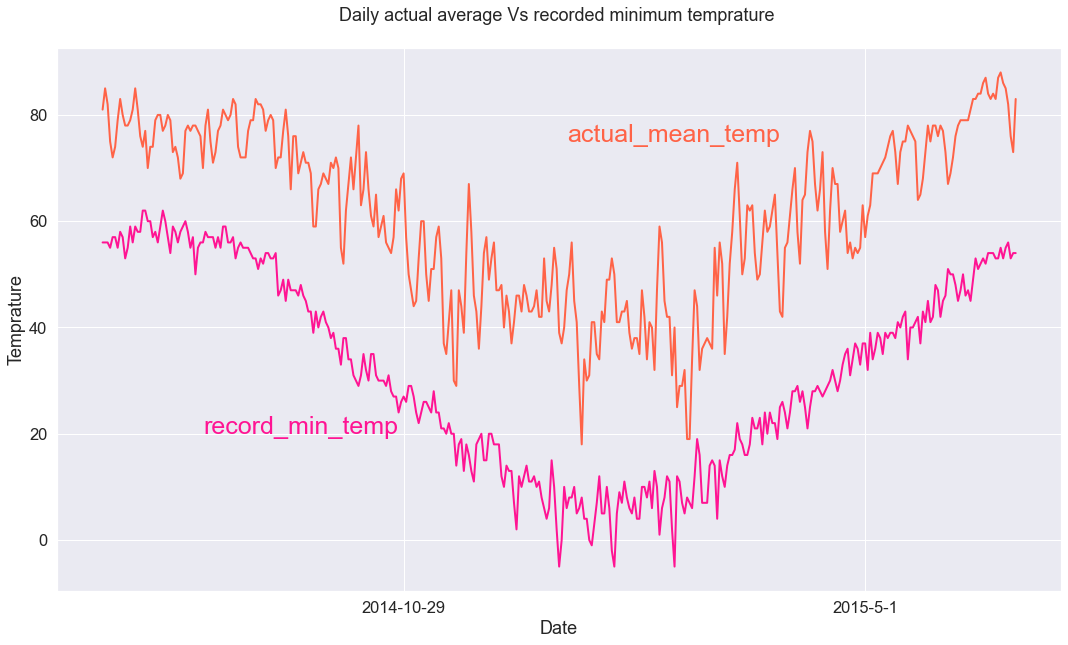

In [11]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.plot('date', 'actual_mean_temp', data=df ,marker='', color='tomato', linewidth=2, label='actual_mean_temp')
ax.plot('date', 'record_min_temp', data=df ,marker='', color='deeppink', linewidth=2, label='record_min_temp')

# Major ticks for every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

ax.set(xlabel="Date",
       ylabel="Temprature",
       title="Daily actual average Vs recorded minimum temprature \n")

ax.annotate('actual_mean_temp', 
     (185, 75), # these are the coordinates to position the label
     color='tomato',
     size=25)
ax.annotate('record_min_temp', 
     (40, 20), # these are the coordinates to position the label
     color='deeppink',
     size=25)

- From the above graph, we can see that the actual mean temperature is above the recorded mean temperature.
- The highest fluctuation is being seen between October 2014 and May 2015.
- The lowest temperature is being noticed for recorded min is in minus and the lowest minimum temperature drop for actual mean is at 18°C.

### Analysis for each day

- Below code to show trend of actual mean temprature and the recorded mean temprature for each day.

Text(20, 350, 'record_min_temp')

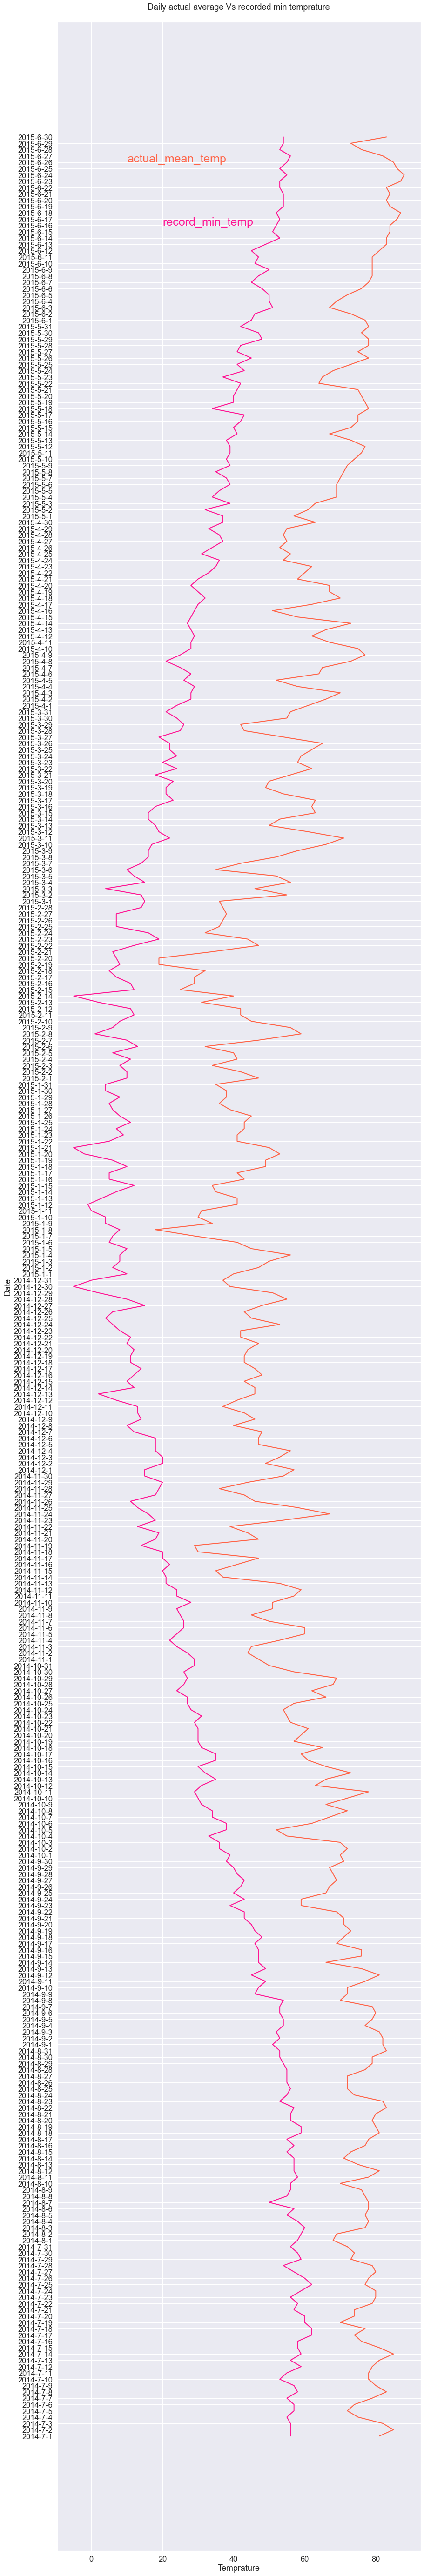

In [12]:
# plotting a line plot after changing it's width and height
fig, ax = plt.subplots(figsize=(14, 100))

ax.plot('actual_mean_temp','date', data=df ,marker='', color='tomato', linewidth=2)
ax.plot('record_min_temp','date', data=df ,marker='', color='deeppink', linewidth=2)

ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}' 
ax.grid(True)

ax.set(ylabel="Date",
       xlabel="Temprature",
       title="Daily actual average Vs recorded min temprature\n")

ax.annotate('actual_mean_temp', 
     (10, 360), # these are the coordinates to position the label
     color='tomato',
     size=25)
ax.annotate('record_min_temp', 
     (20, 350), # these are the coordinates to position the label
     color='deeppink',
     size=25)

- The above graph is same as previous only difference is that it shows tread for each day.

### The second Graph (plot) should have 3 times series plotted on it:

   - (1) the record max temperature,

   - (2) the 20-day exponential moving average of the actual mean temperature, and

   - (3) the actual max temperature 

Both graphsshould have proper axes titles, labels, colored lines, etc. Try to follow Edward Tufte's rules as much as you can.

In [13]:
df['EMA_20D'] = df['actual_mean_temp'].ewm(span=20, adjust=False).mean()

- As explained earlier ewm() helps to calculate the exponential moving average for the span of 20 days for actual_mean_temp

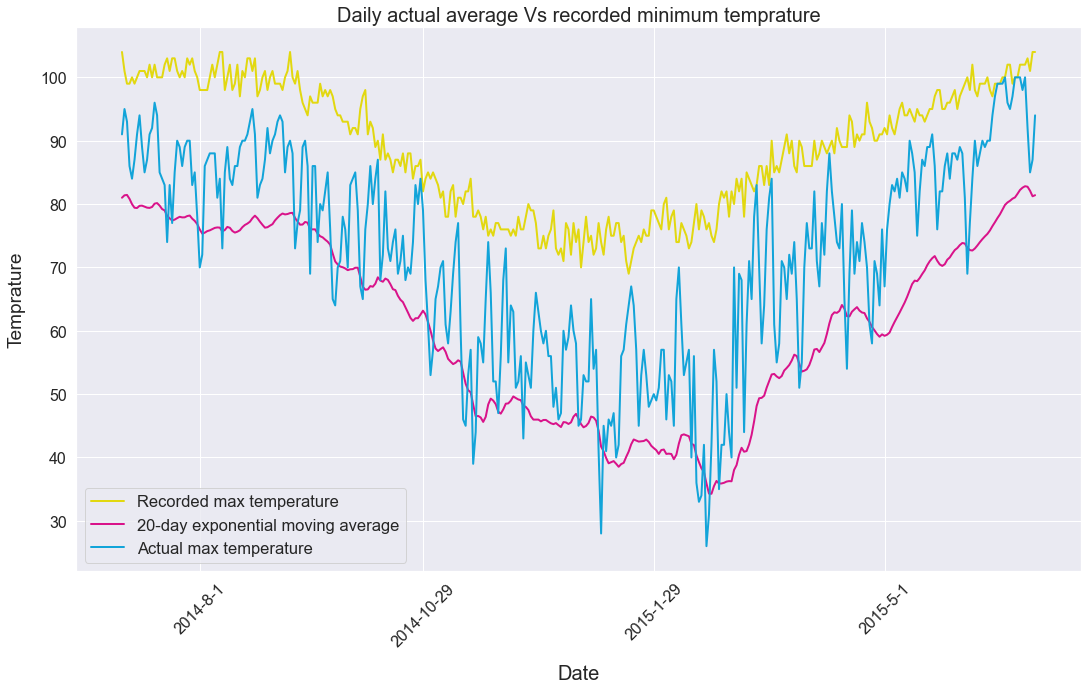

In [14]:
#sns.set(palette='gist_ncar')

fig, ax = plt.subplots(figsize=(18, 10))

sns.lineplot('date', 'record_max_temp', data=df , color = '#e2d810', linewidth=2, label='Recorded max temperature')
sns.lineplot('date', 'EMA_20D', data=df ,marker='',color = '#d9138a' ,linewidth=2, label='20-day exponential moving average')
sns.lineplot('date', 'actual_max_temp', data=df , color = '#12a4d9', linewidth=2, label='Actual max temperature')


# Major ticks for every 6 months.
fmt_half_year = mdates.MonthLocator(interval=3)
ax.xaxis.set_major_locator(fmt_half_year)

plt.title("Daily actual average Vs recorded minimum temprature", fontsize=20)
plt.xlabel("Date", labelpad = 15, fontsize=19)
plt.ylabel("Temprature", labelpad = 15, fontsize=19)
plt.xticks(rotation=45)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.xaxis.label.set_size(20)
plt.show()

- The above graph shows the three-line plots.
    - The yellow line represents the Recorded max temperature.
    - The pink line shows the exponential moving average for 20 days period, and
    - Blueline shows the actual max temperature.
- As we can see, the recorded max temperature is above the exponential moving average and actual max temperature.
- Until October 2014 for all three measures were having temperatures above 60°C.
- During the next six months, the temperature was recorded between 85°C and 25°C.
- In general, the maximum fluctuation has been noticed for actual max temperature was as very less variation recorded for the EMA.
- After January 2015, the temperature for all the three matrices has been raising high.

### References:

- Moving averages with Python
    - https://towardsdatascience.com/moving-averages-in-python-16170e20f6c
- Customize Dates on Time Series Plots in Python Using Matplotlib
    - https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/
